In [44]:
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
df.nunique()

unique_id                3597
amount                    703
date_time_of_pickup     49555
longitude_of_pickup     33716
latitude_of_pickup      36594
longitude_of_dropoff    34878
latitude_of_dropoff     37423
no_of_passenger             7
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.dropna(axis=0, inplace=True)
np.sum(pd.isnull(df))

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [13]:
df['amount'][df['amount']<0] = 0.1
df[df['amount']<0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [17]:
df['date_time_of_pickup'] = pd.to_datetime(df.date_time_of_pickup)

In [19]:
df.loc[:, 'pickup_hour'] = df['date_time_of_pickup'].dt.hour
df.loc[:, 'pickup_weekday'] = df['date_time_of_pickup'].dt.day_name()
df.loc[:, 'pickup_date'] = df['date_time_of_pickup'].dt.day
df.loc[:, 'pickup_month'] = df['date_time_of_pickup'].dt.month
df.loc[:, 'pickup_day'] = df['date_time_of_pickup'].dt.dayofweek


In [21]:
def baseFare(x):
    if x in range(16,20):
        base_fare = 3.50
    elif x in range(20,24):
        base_fare = 3
    else:
        base_fare = 2.50
    return base_fare

df['base_fare'] = df['pickup_hour'].apply(baseFare)
df['base_fare'], df['pickup_hour']

(0        3.5
 1        3.5
 2        2.5
 3        2.5
 4        2.5
         ... 
 49995    3.0
 49996    3.5
 49997    2.5
 49998    2.5
 49999    2.5
 Name: base_fare, Length: 50000, dtype: float64,
 0        17
 1        16
 2         0
 3         4
 4         7
          ..
 49995    23
 49996    17
 49997     4
 49998     7
 49999     8
 Name: pickup_hour, Length: 50000, dtype: int64)

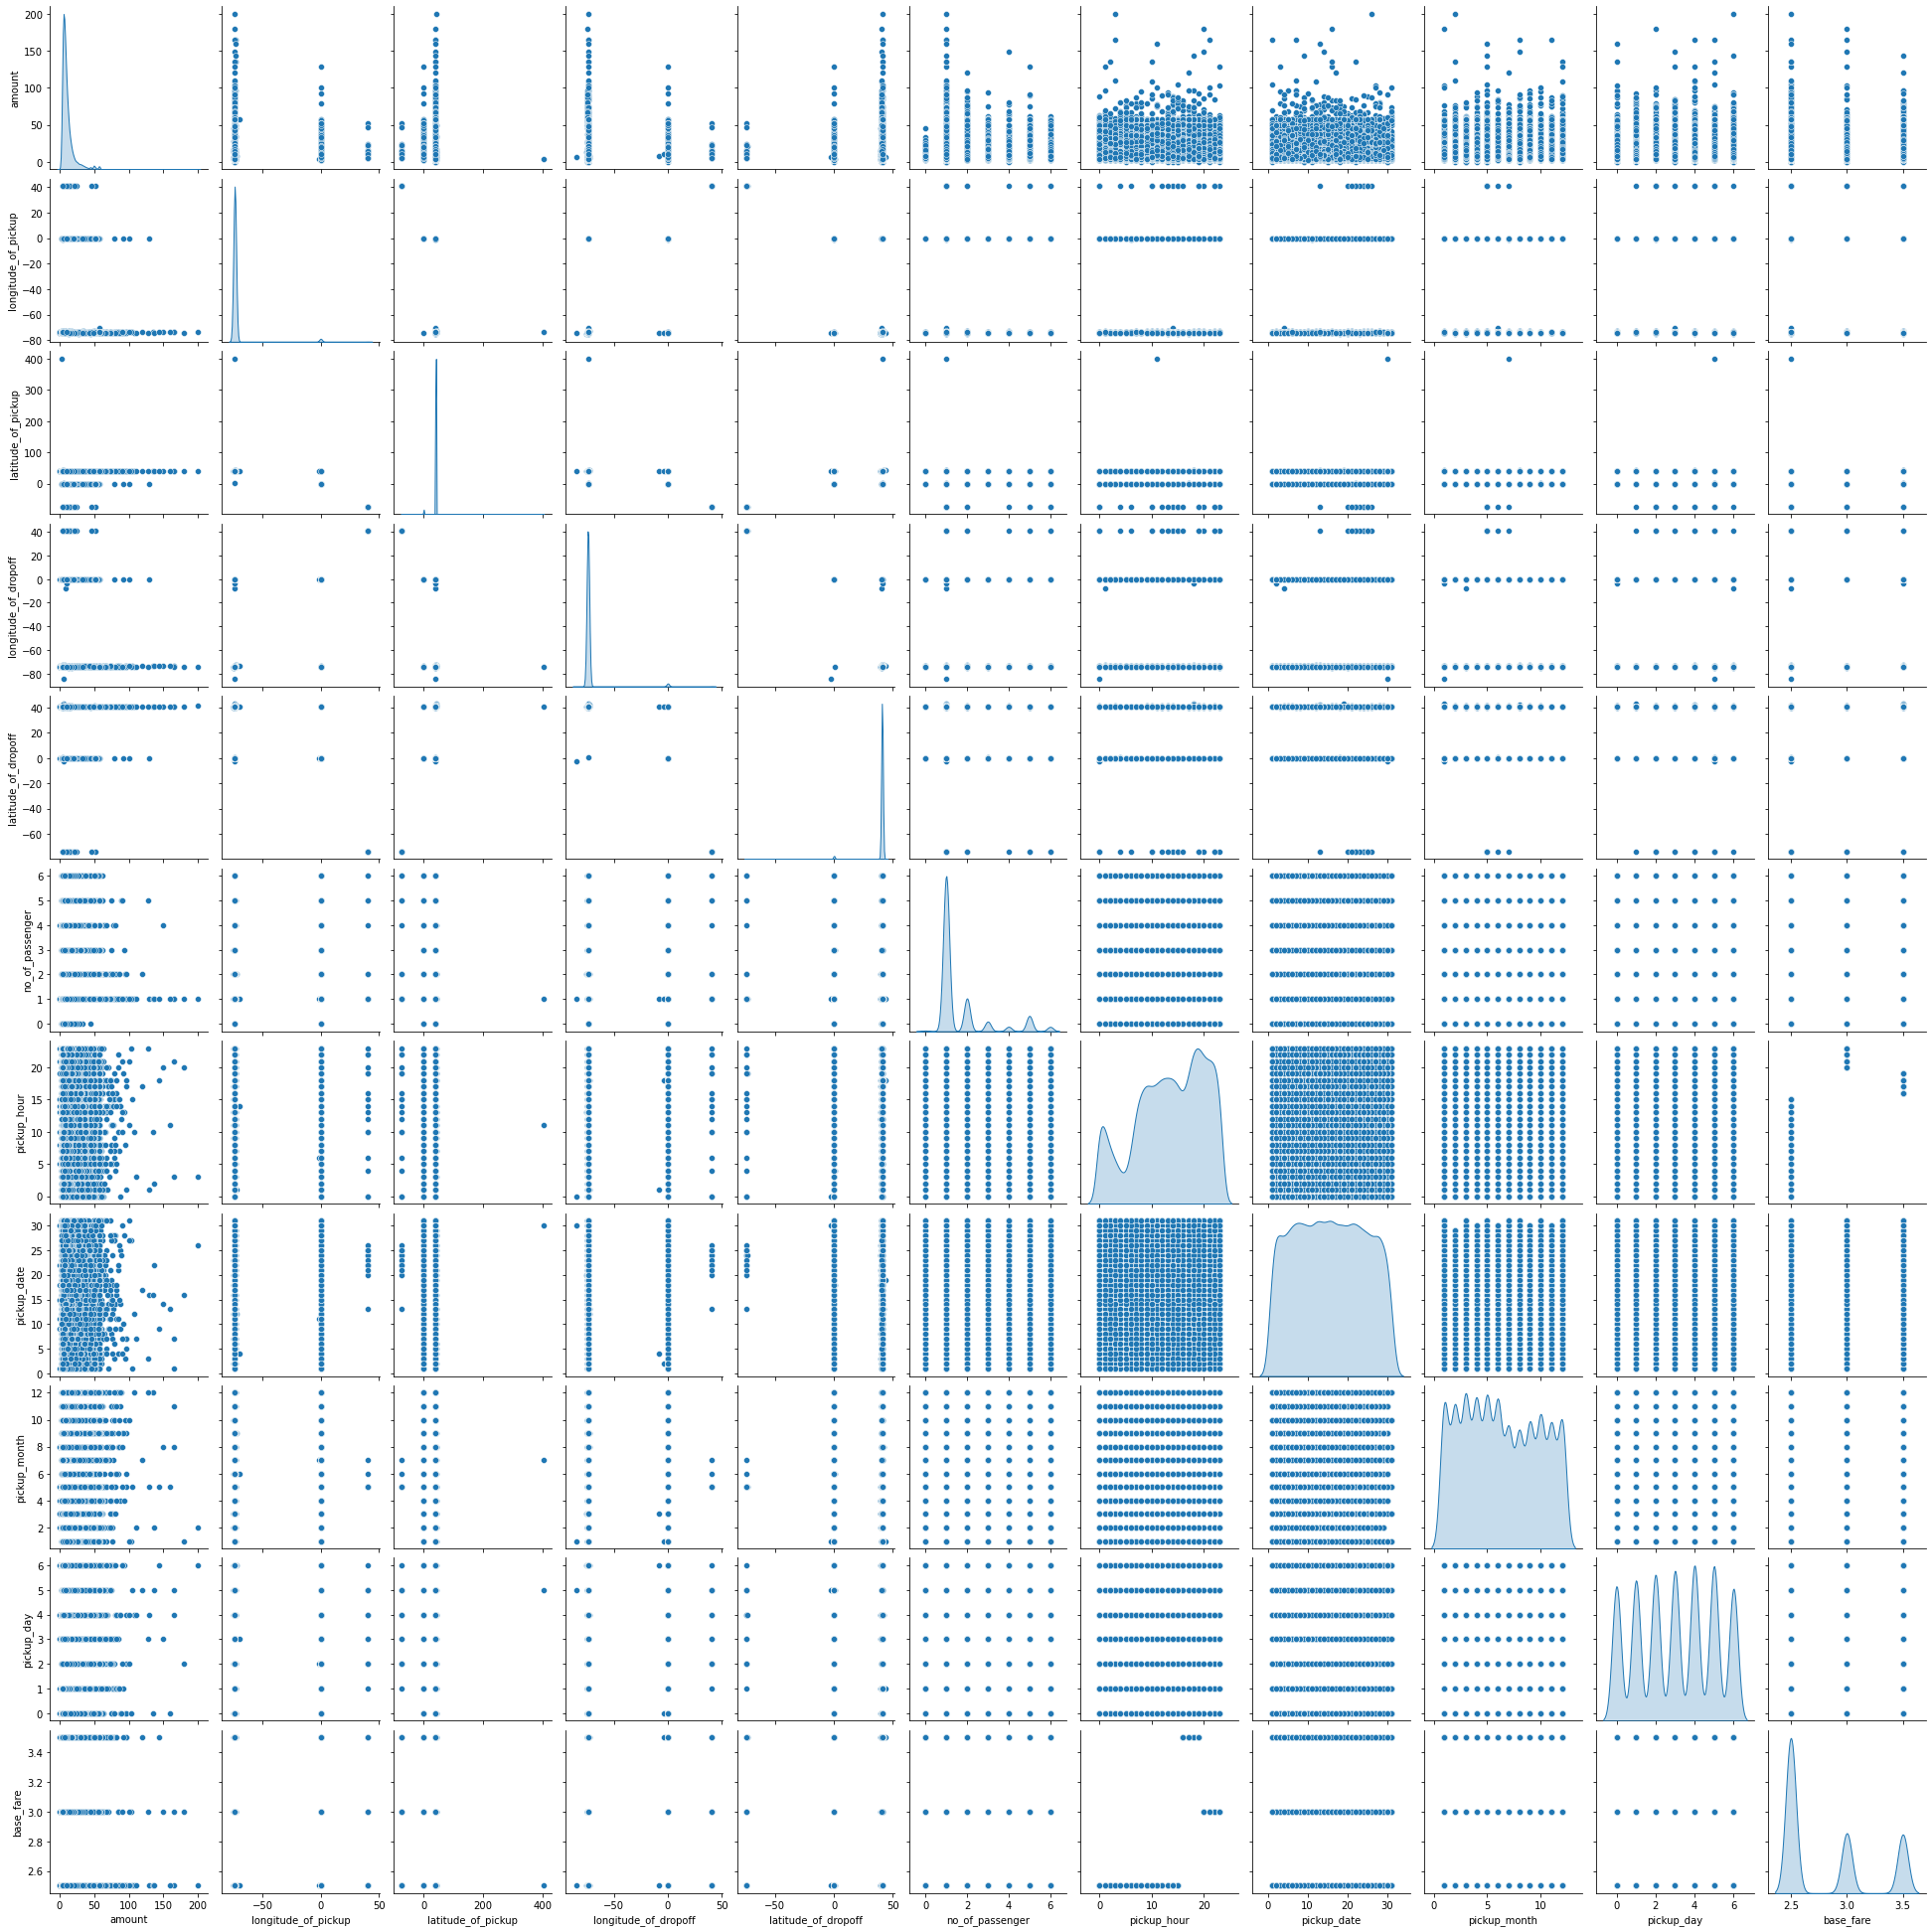

In [42]:
sb.pairplot(df,diag_kind="kde")

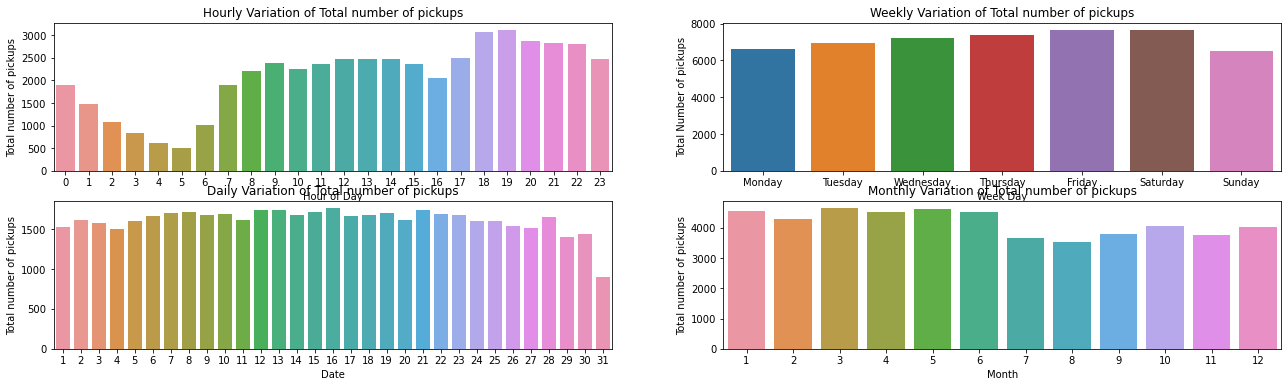

In [22]:

plt.figure(figsize=(22, 6))


plt.subplot(221)
sb.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.title('Hourly Variation of Total number of pickups')

plt.subplot(223)
sb.countplot(df['pickup_date'])
plt.xlabel('Date')
plt.ylabel('Total number of pickups')
plt.title('Daily Variation of Total number of pickups')


plt.subplot(222)
sb.countplot(df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')
plt.title('Weekly Variation of Total number of pickups')

plt.subplot(224)
sb.countplot(df['pickup_month'])
plt.xlabel('Month')
plt.ylabel('Total number of pickups')
plt.title('Monthly Variation of Total number of pickups');

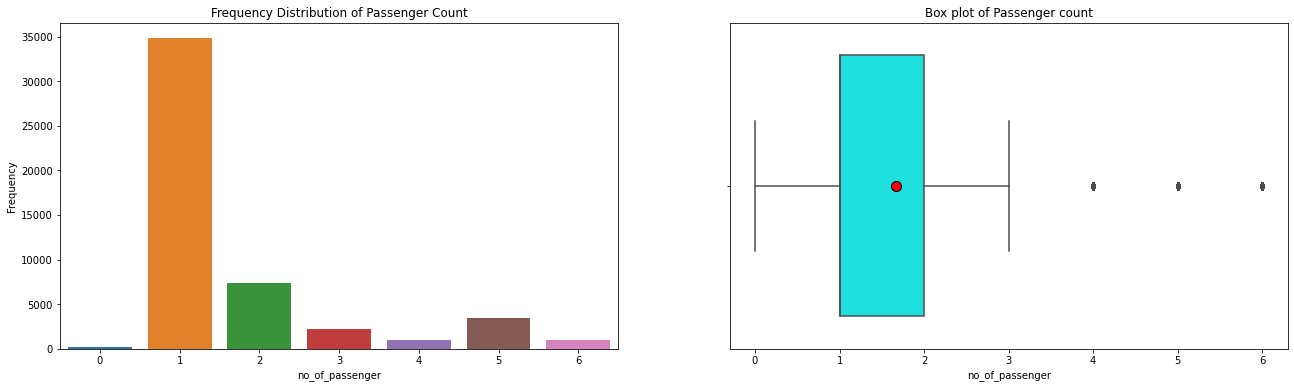

In [24]:
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(121)
sb.countplot(df['no_of_passenger'])
plt.xlabel('no_of_passenger')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Passenger Count')

plt.subplot(122)
sb.boxplot(df['no_of_passenger'], color = 'cyan', showmeans=True, 
           meanprops={"marker":"o", "markerfacecolor":"Red", 
                      "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('no_of_passenger')
plt.title('Box plot of Passenger count');

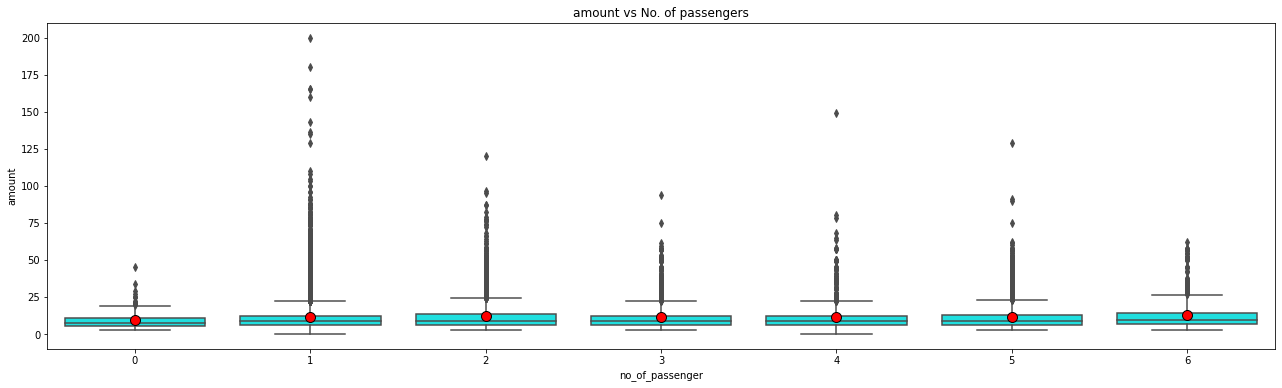

In [25]:
plt.figure(figsize=(22, 6))
sb.boxplot(x = df['no_of_passenger'],y = df['amount'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('no_of_passenger')
plt.title ("amount vs No. of passengers");

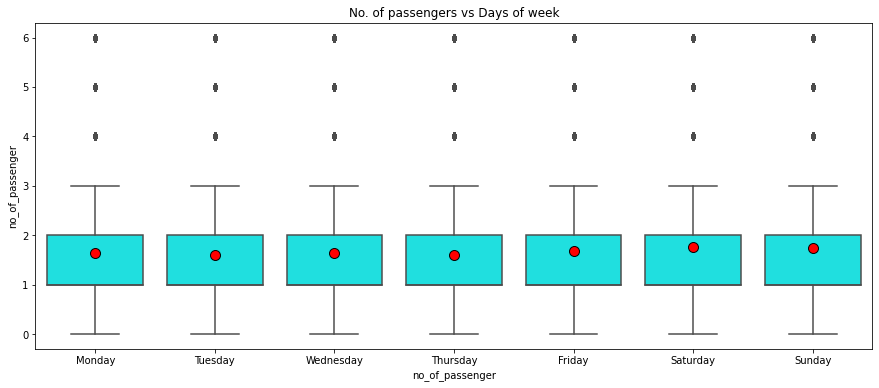

In [26]:
plt.figure(figsize=(15, 6))
sb.boxplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],y = df['no_of_passenger'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('no_of_passenger')
plt.title ("No. of passengers vs Days of week");

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   pickup_hour           50000 non-null  int64              
 9   pickup_weekday        50000 non-null  object             
 10  pickup_date           50000 non-null  int64              
 11  pickup_month          50000 non-null  int64              
 12  pick

In [29]:
X = df.drop(['unique_id', 'date_time_of_pickup','pickup_weekday', 'amount',  'base_fare', 'latitude_of_pickup', 'pickup_hour'], 
            axis = 1)
y = df['amount']

In [30]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.12839972, -0.1284649 ,  0.13068477, -0.51803399, -0.07759648,
        -0.07896283, -1.54834424],
       [-0.14492282, -0.14169175,  0.14227741, -0.51803399, -1.23223727,
        -1.52358098, -1.03733617],
       [-0.14171801, -0.14284227,  0.13704986,  0.25765179,  0.26879576,
         0.49888443, -0.01532002],
       [-0.14214057, -0.1428735 ,  0.1383018 , -0.51803399,  0.61518799,
        -0.65681009,  1.00669612],
       [-0.14030918, -0.13951898,  0.14256969, -0.51803399, -0.77038095,
        -0.94573372, -1.03733617]])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(35000, 7)
(35000,)
(15000, 7)
(15000,)


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mean_pred = np.repeat(y_train.mean(),len(y_test))
sqrt(mean_squared_error(y_test, mean_pred))

9.754793468355661

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train, y_train, cv=5))

0.0008022469621557171

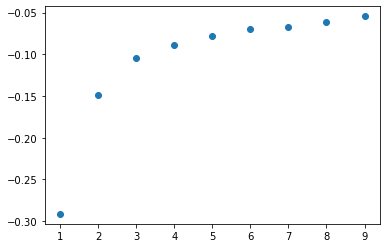

In [34]:
from sklearn.neighbors import KNeighborsRegressor
cv_score=[]
for i in range(1,10):
 knn = KNeighborsRegressor(n_neighbors= i)
 cv_score.append(np.mean(cross_val_score(knn,X_train, y_train,cv=5)))
x = range(1,10)
plt.scatter(x,cv_score);

In [35]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
R_Squared = np.mean(cross_val_score(DT, X_train, y_train, cv=5))
Standard_deviation = np.std(cross_val_score(DT, X_train, y_train, cv=5))
print('R2 of Decision Tree Regression model is:',R_Squared)
print('Standard deviation of R2 of Decision Tree Regression model is:',Standard_deviation)

R2 of Decision Tree Regression model is: 0.3919141509676972
Standard deviation of R2 of Decision Tree Regression model is: 0.05275665143500554


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
np.mean(cross_val_score(GB, X_train, y_train, cv=5))

0.6759550118920219

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
R_Squared = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
Standard_deviation = np.std(cross_val_score(rf, X_train, y_train, cv=5))
print('R2 of Random Forest Regression model is:',R_Squared)
print('Standard deviation of R2 of Random Forest Regression model is:',Standard_deviation)

R2 of Random Forest Regression model is: 0.6879942576619724
Standard deviation of R2 of Random Forest Regression model is: 0.009331709584779028


In [45]:
def model_train_evaluation(y, ypred, model_name): 
       
    # Model Evaluation metrics
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
    print("\n \n Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    print('Mean absolute percentage error (MAPE) of', model_name,':', mean_absolute_percentage_error(y, ypred))
    print('Explained Variance Score (EVS) of', model_name,':', explained_variance_score(y, ypred))
    print('R2 of', model_name,':', (r2_score(y, ypred)).round(2))
    print('\n \n')

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit (X_train, y_train)
Yhat_rf = rf.predict(X_test)
model_train_evaluation(y_test, Yhat_rf, 'Random Forest Regression Model')


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Random Forest Regression Model : 3.1788332203386243
Mean Squared Error(MSE) of Random Forest Regression Model : 36.915437563644986
Root Mean Squared Error (RMSE) of Random Forest Regression Model : 6.0758075647312095
Mean absolute percentage error (MAPE) of Random Forest Regression Model : 2964839730688.414
Explained Variance Score (EVS) of Random Forest Regression Model : 0.6124508280010843
R2 of Random Forest Regression Model : 0.61

 



In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit (X_train, y_train)
Yhat_lr = lr.predict(X_test)
model_train_evaluation(y_test, Yhat_lr, 'Linear regression Model')


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Linear regression Model : 6.041949056625412
Mean Squared Error(MSE) of Linear regression Model : 95.10295296478397
Root Mean Squared Error (RMSE) of Linear regression Model : 9.752074290364279
Mean absolute percentage error (MAPE) of Linear regression Model : 3297674308934.1133
Explained Variance Score (EVS) of Linear regression Model : 0.0005527627417171166
R2 of Linear regression Model : 0.0

 



In [48]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor()
SGD.fit (X_train, y_train)
Yhat_SGD = SGD.predict(X_test)
model_train_evaluation(y_test, Yhat_SGD, 'SGD Regression Model')


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of SGD Regression Model : 6.06081472316431
Mean Squared Error(MSE) of SGD Regression Model : 95.19082305844114
Root Mean Squared Error (RMSE) of SGD Regression Model : 9.756578450381115
Mean absolute percentage error (MAPE) of SGD Regression Model : 3297317026472.2925
Explained Variance Score (EVS) of SGD Regression Model : -0.0003967141628622439
R2 of SGD Regression Model : -0.0

 

